# クラスタリングスクラッチ

In [363]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [364]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
print(X)
print(X.shape)
print(X[:, 0].shape)
print(X[:, 1].shape)
print(X[99:100, :])

[[ 0.72086751  3.71347124]
 [-1.89468423  7.96898545]
 [ 1.35678894  4.36462484]
 [ 1.05374379  4.49286859]
 [ 1.59141542  4.90497725]
 [ 0.78260667  4.15263595]
 [-1.95751686  3.87291474]
 [-0.77354537  7.87923564]
 [ 0.12313498  5.27917503]
 [-1.43284669  7.71577043]
 [-0.92819001  7.02698199]
 [-1.74836345  7.06307447]
 [-1.26789718  7.25141327]
 [-0.98661744  7.74968685]
 [-0.81984047  7.50994722]
 [ 2.99684287  0.22378413]
 [ 1.46870582  1.86947425]
 [-0.33533163  3.390122  ]
 [-1.86407034  2.93379754]
 [ 2.62496786  0.28025075]
 [ 2.11114739  3.57660449]
 [-1.8219901   7.61654999]
 [-1.91186205  3.18750686]
 [ 2.28809874  0.12954182]
 [ 0.5285368   4.49723858]
 [-1.57613028  2.58614312]
 [-0.565433    3.65813966]
 [ 0.802314    4.38196181]
 [ 2.79939362  1.84560825]
 [ 2.64465731  0.80770124]
 [ 1.7190373   0.71788708]
 [-0.93564005  7.03443119]
 [ 2.14398059  0.69677319]
 [ 2.06051753  1.79059891]
 [-1.21986433  3.3789856 ]
 [ 1.13280393  3.87673946]
 [-1.497272    8.80022604]
 

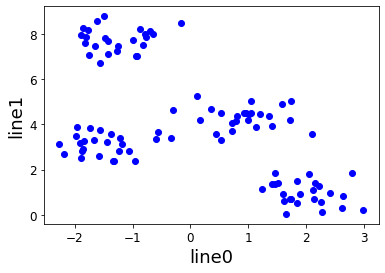

In [365]:
plt.xlabel("line0", size=18)
plt.ylabel("line1", size=18)
plt.tick_params(labelsize=12)
plt.scatter(X[:, 0], X[:, 1], c='blue')

4つのクラスタに分ければ良さそう。。

**実装手順の確認**

1. サンプル数のインデックスに対し、kクラス分のランダムな初期ラベルを割り当てる

2. 各ラベル毎にデータ点をグルーピングし、クラスタを作成する

3. クラスタ毎にデータ点の平均値を求め、そのクラスタの重心とする

4. その重心から、すべてのサンプルのデータ点との距離を計算する

5. 各データ点から見て、距離が最小となる重心のクラスタにそのデータ点を割り当てる

6. 3〜5を繰り返す

7. 収束条件(値が変化しない・定義した反復回数に達した等)を満たしたら、終了

8. 初期値を変更し1~7をn回繰り返し、SSEが最小のものを選ぶ
 

In [366]:
#①ラベルつくり
y0 = np.full(25, 0)
y1 = np.full(25, 1)
y2 = np.full(25, 2)
y3 = np.full(25, 3)

y = np.concatenate([y0.reshape(-1, 1), y1.reshape(-1, 1), 
                    y2.reshape(-1, 1), y3.reshape(-1, 1)], axis=0)
print(y.shape)

(100, 1)


In [367]:
X0 = X[:25, :]
print(X0.shape)
X1 = X[25:50, :]
print(X1.shape)
X2 = X[50:75, :]
print(X2.shape)
X3 = X[75:100, :]
print(X3.shape)

(25, 2)
(25, 2)
(25, 2)
(25, 2)


In [368]:
Xy =  np.concatenate([X, y], axis=1)
print(Xy)

[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  0.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  0.        ]
 [-0.77354537  7.87923564  0.        ]
 [ 0.12313498  5.27917503  0.        ]
 [-1.43284669  7.71577043  0.        ]
 [-0.92819001  7.02698199  0.        ]
 [-1.74836345  7.06307447  0.        ]
 [-1.26789718  7.25141327  0.        ]
 [-0.98661744  7.74968685  0.        ]
 [-0.81984047  7.50994722  0.        ]
 [ 2.99684287  0.22378413  0.        ]
 [ 1.46870582  1.86947425  0.        ]
 [-0.33533163  3.390122    0.        ]
 [-1.86407034  2.93379754  0.        ]
 [ 2.62496786  0.28025075  0.        ]
 [ 2.11114739  3.57660449  0.        ]
 [-1.8219901   7.61654999  0.        ]
 [-1.91186205  3.18750686  0.        ]
 [ 2.28809874  0.12954182  0.        ]
 [ 0.5285368   4.49723858  0.        ]
 [-1.57613028  2.58614312

In [373]:
# クラスタ数
n_clusters = 4

# 最大ループ数
max_iter = 550

# 所属クラスタ
clusters = np.random.randint(0, n_clusters, Xy.shape[0])
print(clusters.shape)

(100,)


In [377]:
for i in range(max_iter):
    # 中心点の更新
    # 各クラスタのデータ点の平均をとる
    centroids = np.array([Xy[clusters == n, 0:2].mean(axis = 0)
                          for n in range(n_clusters)])
    print("中心点の更新回数：{}".format(i))
    print("中心点の座標:{}".format(centroids))

    # 所属クラスタの更新
    # 一番近い中心点のクラスタを所属クラスタに更新する
    # np.linalg.normでノルムが計算できる（ユーグリット距離）
    # argminで最小値のインデックスを取得できる(SSE)
    new_clusters = np.array([np.linalg.norm(Xy[:, 0:2] - c, axis = 1)for c in centroids]).argmin(axis = 0)
    #SSEの算出
    r = 1
    SSE = np.argmin(np.sum((X[i,0:2] - c)**2,axis=1))
    print("新しいクラスター：{}".format(new_clusters))
    print("SSE：{}".format(new_clusters))
    # 空のクラスタがあった場合は中心点をランダムな点に割り当てなおす
    for n in range(n_clusters):
        if not np.any(new_clusters == n):
            centroids[n] = Xy[np.random.choice(Xy.shape[0], 1), :]

    # 収束判定
    if np.allclose(clusters, new_clusters):
        break

    clusters = new_clusters
    

中心点の更新回数：0
中心点の座標:[[-0.22989824  4.59921394]
 [-0.54015297  4.49371268]
 [ 0.34853072  3.78010296]
 [ 0.57041434  3.31276416]]


NameError: name 'c' is not defined

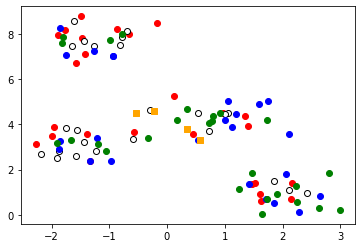

In [375]:
p = plt.subplot()

p.scatter(Xy[clusters==0, 0], Xy[clusters==0, 1], c = 'red')
p.scatter(Xy[clusters==1, 0], Xy[clusters==1, 1], c = 'white', edgecolors='black')
p.scatter(Xy[clusters==2, 0], Xy[clusters==2, 1], c = 'blue')
p.scatter(Xy[clusters==3, 0], Xy[clusters==3, 1], c = 'green')

# 中心点
p.scatter(centroids[:, 0], centroids[:, 1], color='orange', marker='s')

plt.show()

### 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0



In [313]:
distance = []
idx = np.zeros(X.shape[0])
#print(idx)

for i in range(X.shape[0]):
    distance.append(np.sum((X[i, :] - centroids)**2, axis=1))# X全ての座標を4つの中心点から引いた距離
    idx[i] = np.argmin(np.sum((X[i, :] - centroids)**2, axis=1))#中心点との距離が一番短いX座標のインデックス

#print(distance)
#print(idx)

In [314]:
allocation = np.c_[idx, distance]
#print(allocation)

In [359]:
sse = 0
sse_list = []
for j in range(centroids.shape[0]):
    for i in range(allocation.shape[0]):
        if j == allocation[i, 0]:
            sse += sum(allocation[i])
            sse_list.append(sse)
            #print(sse)
print(sse)
print(sse_list)

6917.554305456082
[126.11705049100487, 186.01178874287984, 302.18053152203163, 416.47097614962286, 499.0480674585606, 600.8613543131106, 689.1899413045771, 784.5035522865803, 853.9476839168444, 925.6170942681382, 1015.6196632083576, 1101.1426028985086, 1194.5755430411355, 1277.8192847923879, 1346.8290404463535, 1431.6087971428265, 1500.3760604963325, 1579.4008856598614, 1649.4940502812653, 1750.617062216606, 1823.1797116922125, 1930.6297954460117, 2019.258001518245, 2100.763415477799, 2196.2042556032966, 2306.739561951643, 2402.140701711482, 2498.6748820441235, 2571.9299335610312, 2655.1119445559953, 2737.0260983945554, 2830.0910433252066, 2915.014578434812, 3013.8715331467733, 3087.362720948547, 3221.243226548393, 3334.881650503172, 3407.8982959691043, 3527.315462676256, 3614.85596092189, 3722.70378456008, 3820.955726466379, 3902.006474300326, 4005.9739510376967, 4121.254257418375, 4222.145175969359, 4350.365799117158, 4456.147637723989, 4549.021850597743, 4648.118031193893, 4685.2575

In [354]:
print(sorted(sse_list, reverse=True))

[6917.554305456082, 6871.115577982145, 6810.534219577995, 6765.190431387849, 6710.476296644264, 6664.0243183057855, 6619.237005643858, 6569.669854521156, 6530.382521074824, 6475.818611928213, 6412.756102456713, 6361.7540604967035, 6312.954616280582, 6264.48138428485, 6211.8918140903925, 6155.57351501937, 6102.008569145286, 6054.701570204623, 5994.289885578857, 5950.287324151148, 5912.351733222687, 5857.518453383634, 5803.4482211439945, 5748.122586852942, 5709.982217254325, 5658.000649307763, 5621.283711114815, 5584.941432403559, 5545.790460655324, 5506.505520776882, 5460.240209519787, 5425.215236007113, 5382.8384251020125, 5344.200915985521, 5305.353726366242, 5264.414427180749, 5214.02260005807, 5177.091250230303, 5139.138074897162, 5102.422333661854, 5059.605810361772, 5019.87571065292, 4982.2415767091225, 4945.605779736137, 4892.754752760606, 4851.749482340057, 4814.6453911194185, 4767.211103916581, 4727.445776111781, 4685.257522556884, 4648.118031193893, 4549.021850597743, 4456.147

ConversionError: Failed to convert value(s) to axis units: 'Number of clusters'

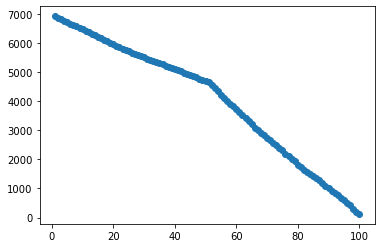

In [360]:
plt.plot(range(1,1), sorted(sse_list, reverse=True), marker='o')
plt.xticks('Number of clusters')
plt.xlabel(np.arange(1,11,1))
plt.ylabel('SSE')
plt.show()

In [228]:
#初期値を更新するプログラム

In [ ]:
p = plt.subplot()

p.scatter(Xy[clusters==0, 0], Xy[clusters==0, 1], c = 'red')
p.scatter(Xy[clusters==1, 0], Xy[clusters==1, 1], c = 'white', edgecolors='black')
p.scatter(Xy[clusters==2, 0], Xy[clusters==2, 1], c = 'blue')
p.scatter(Xy[clusters==3, 0], Xy[clusters==3, 1], c = 'green')

# 中心点
p.scatter(centroids[:, 0], centroids[:, 1], color='orange', marker='s')

plt.show()

In [235]:
distance_matrix = np.zeros((X.shape[0], 4))

for i in range(n_clusters):
    for j in range(X.shape[0]):
        diff = centroids[i] - X[j]
        distance_matrix[j][i] = np.linalg.norm(diff)   

ValueError: operands could not be broadcast together with shapes (3,) (2,) 